<a href="https://colab.research.google.com/github/SOOOO00/AI-Research-Notes/blob/main/01_ML_Basics/01_Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install -q scikit-learn pandas matplotlib


In [7]:
#加载数据并查看
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = fetch_california_housing(as_frame = True)
df = data.frame #DataFrame,包含features + target 列 target
df.rename(columns = {'MedHouseVal':'PRICE'},inplace = True)

# 显示前5行&基本信息
print(df.shape)
display(df.head())
display(df.describe())

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
#划分训练/测试集并标准化
#特征与目标
X = df.drop(columns = ['PRICE'])
y = df['PRICE']

#划分数据集
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size = 0.2,random_state = 42
)

#标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("训练样本：",X_train.shape,"测试样本：",X_test.shape)

训练样本： (16512, 8) 测试样本： (4128, 8)


Train MSE: 0.5179, R2: 0.6126
Test  MSE: 0.5559, R2: 0.5758


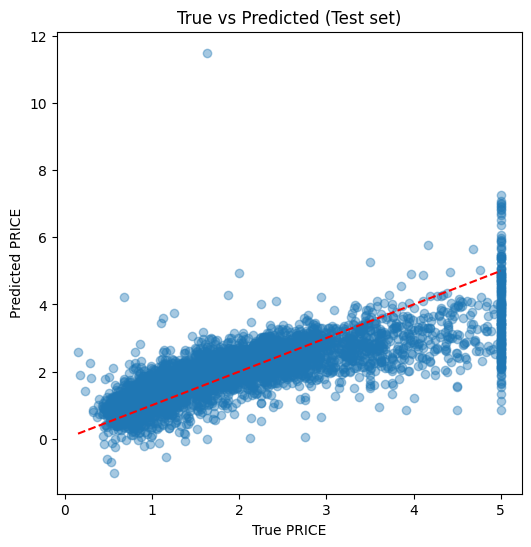

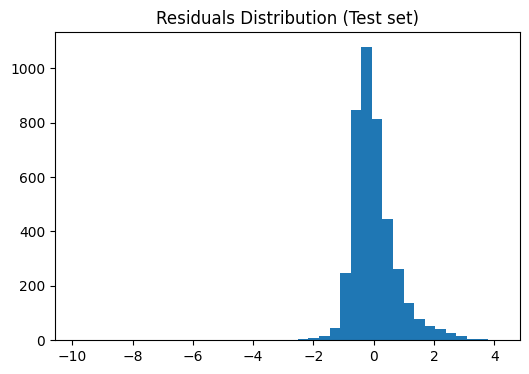

In [9]:
#训练线性回归，评估并绘图（MSE，R2）
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 训练
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# 预测
y_pred_train = lr.predict(X_train_scaled)
y_pred_test  = lr.predict(X_test_scaled)

# 评估
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test  = mean_squared_error(y_test, y_pred_test)
r2_train  = r2_score(y_train, y_pred_train)
r2_test   = r2_score(y_test, y_pred_test)

print(f"Train MSE: {mse_train:.4f}, R2: {r2_train:.4f}")
print(f"Test  MSE: {mse_test:.4f}, R2: {r2_test:.4f}")

# 绘制
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True PRICE")
plt.ylabel("Predicted PRICE")
plt.title("True vs Predicted (Test set)")
plt.show()

# 残差直方图
residuals = y_test - y_pred_test
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=40)
plt.title("Residuals Distribution (Test set)")
plt.show()


In [10]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,random_state = 42,n_jobs = -1)
rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test,y_pred_rf)
r2_rf = r2_score(y_test,y_pred_rf)

print(f"RandomForest Test MSE:{mse_rf:.4f},R2:{r2_rf:.4f}")

RandomForest Test MSE:0.2554,R2:0.8051
